<a href="https://colab.research.google.com/github/Wilieperez/IA_HeartDisease/blob/main/Proyecto_Final_HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network
Para calcular si hay riesgo de enfermedades cardiacas

## Import Libraries

In [131]:
import numpy as np
import pandas as pd
import tensorflow as tf

# Part 1. Data Processing

## Import Database

In [132]:
dataset = pd.read_csv('HeartEdited.csv')
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

## Encode Values

In [133]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X[:, 1] = le.fit_transform(X[:, 1])
X[:, 2] = le.fit_transform(X[:, 2])
X[:, 6] = le.fit_transform(X[:, 6])
X[:, 8] = le.fit_transform(X[:, 8])
X[:, 10] = le.fit_transform(X[:, 10])

print(X[0])

[56 1 0 120 85 0 1 140 0 0.0 2]


## Separate into training and testing variables

In [134]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=0)

## Feature Scaling

In [135]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Part 2. Create the Artificial Neural Network

## Initialize the ANN

In [136]:
ann = tf.keras.models.Sequential()

## Add Input Layer and First Hidden Layer

In [137]:
ann.add(tf.keras.layers.Dense(units = 32, activation = 'relu'))

## Add Second Hidden Layer

In [138]:
ann.add(tf.keras.layers.Dense(units = 32, activation = 'relu'))

## Add Output Layer

In [139]:
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

# Part 3. ANN Training

## ANN Compilation

In [140]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

## Training the ANN Model with The Database

In [141]:
ann.fit(X_train, Y_train, batch_size = 32, epochs = 50)

Epoch 1/50
19/19 [==============================] - 1s 2ms/step - loss: 0.2103 - accuracy: 0.6997
Epoch 2/50
19/19 [==============================] - 0s 2ms/step - loss: 0.1662 - accuracy: 0.8054
Epoch 3/50
19/19 [==============================] - 0s 2ms/step - loss: 0.1438 - accuracy: 0.8272
Epoch 4/50
19/19 [==============================] - 0s 2ms/step - loss: 0.1309 - accuracy: 0.8423
Epoch 5/50
19/19 [==============================] - 0s 2ms/step - loss: 0.1234 - accuracy: 0.8490
Epoch 6/50
19/19 [==============================] - 0s 2ms/step - loss: 0.1175 - accuracy: 0.8523
Epoch 7/50
19/19 [==============================] - 0s 2ms/step - loss: 0.1133 - accuracy: 0.8540
Epoch 8/50
19/19 [==============================] - 0s 2ms/step - loss: 0.1096 - accuracy: 0.8540
Epoch 9/50
19/19 [==============================] - 0s 2ms/step - loss: 0.1067 - accuracy: 0.8591
Epoch 10/50
19/19 [==============================] - 0s 2ms/step - loss: 0.1037 - accuracy: 0.8624
Epoch 11/50
19/19 [

## Test Prediction

In [142]:
Y_pred = ann.predict(X_test)
Y_pred = (Y_pred > 0.5)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1),Y_test.reshape(len(Y_test),1)),1))

5/5 [==============================] - 0s 2ms/step
[[0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 

## Show Confusion Matrix

[[74  7]
 [12 57]]
0.8733333333333333


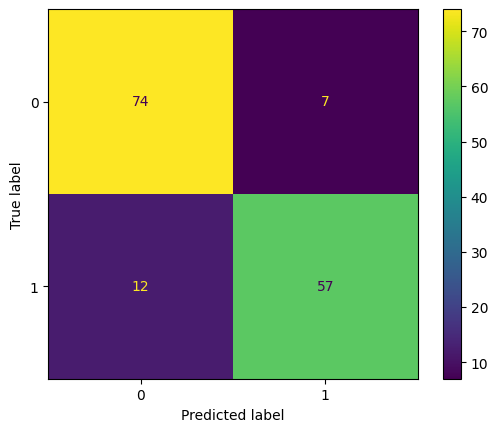

In [143]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
print(accuracy_score(Y_test, Y_pred))
cm_display = ConfusionMatrixDisplay(cm).plot()